# Trabajo Práctico Nº 1

Objetivos:
* Aplicar conceptos de procesamiento de señales en python, como convolución.
* Familiarizarse con el entorno de desarrollo de python notebooks

## Ejercicios
1- Encontrar la función de transferencia del moving average

2- Inyectar al moving average una cuadrada de amplitud 1 y frecuencia 2KHz y una triangular de 1KHz. Analizar los resultados.

3- Realizar un algoritmo de convolución en float y en punto fijo, comparar tiempos y error a la salida. Probar estrategias de redondeo, saturación y truncamiento.
Medir tiempos de computo con el método: timeit de la lib timeit de la siguiente forma:

In [2]:
%pylab inline
import timeit
import time
import numpy as np
from __future__ import division

t = np.arange(0, 1024/20000, 1/20000)
s1= sin(2*np.pi*1000*t)+1 
s2 = sin(2*np.pi*1200*t)

# METODO 1 de medición de tiempos

# Este wrapper empaqueta funciones para que el timeit pueda medir solo eso
def wrapper(func, *args):
    def wrapped():
        return func(*args)
    return wrapped

conv = wrapper(np.convolve, s1, s2)
print (timeit.timeit(conv, number=1))

# METODO 2 de medición de tiempos
start = time.time()
conv_r = np.convolve(s1,s2)
end = time.time()
print (end-start)



Populating the interactive namespace from numpy and matplotlib
0.0003081
0.0


La diferencia en la medición depende de la carga de la CPU y que el primer método mide solamente la función pedida. Usar uno de los 2 para realizar la medición, como la medición es comparativa, solo importa usar el mismo método para todo, los valores absolutos no importan.

Populating the interactive namespace from numpy and matplotlib
0.000321400000757
0.0


<Figure size 432x288 with 0 Axes>

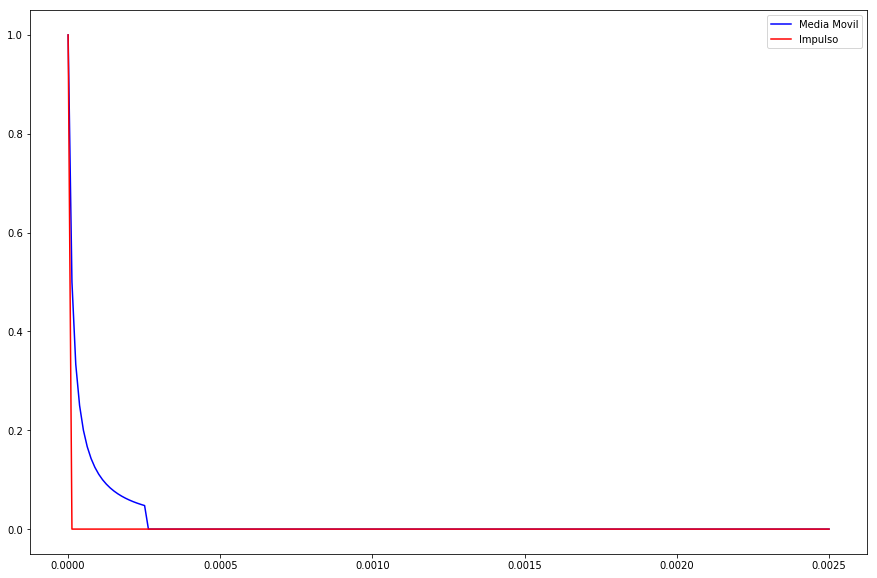

<Figure size 432x288 with 0 Axes>

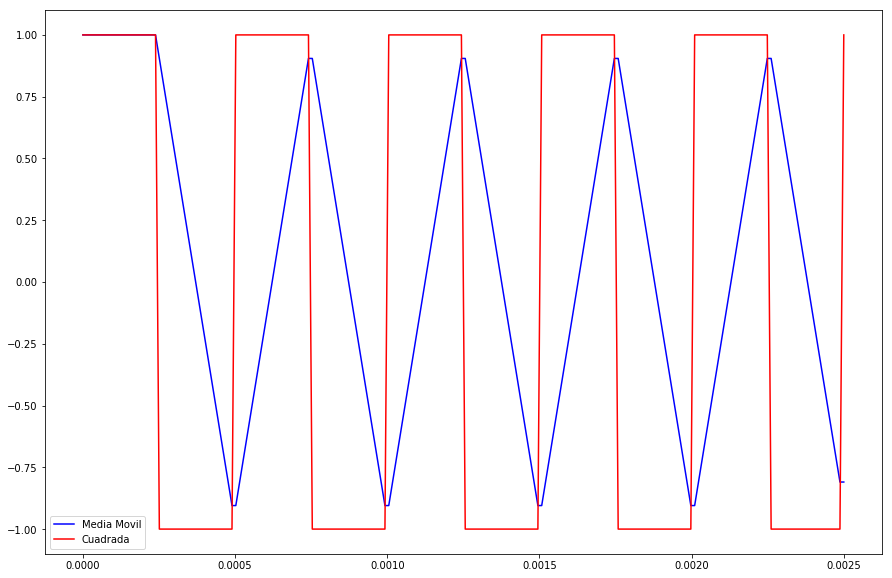

<Figure size 432x288 with 0 Axes>

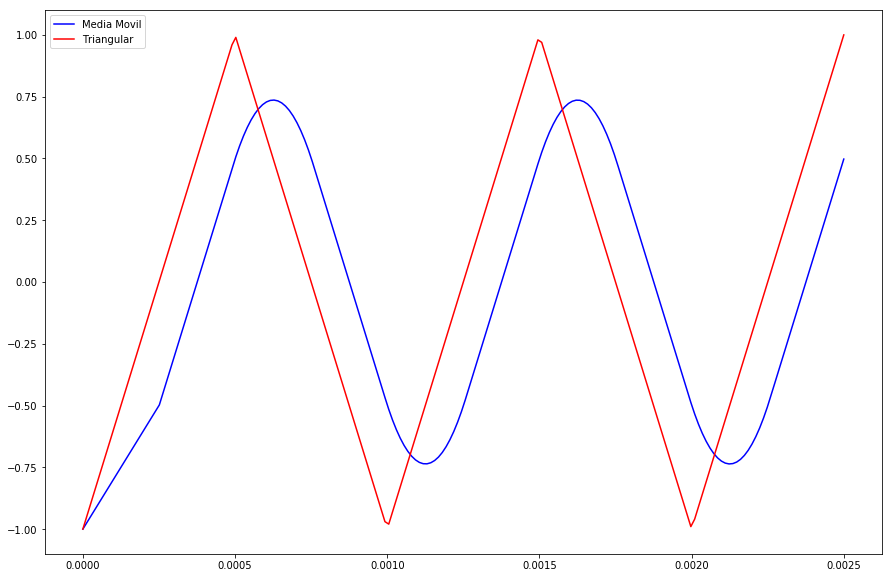

'\n# se copia el array impulso\ntmp = np.copy(impulso)\n\n\n\nconvolve_cuad = sig.convolve(impulso,cuadrada)\nconvolve_triangular = sig.convolve(impulso,triangular)\n\n#print(cuadrada[:100])\n\n#se hace la convolucion\n# se copia el array impulso para realizar la convoluci\xc3\xb3n\ntmp = np.copy(impulso)\nconv_cuadrada = np.empty(0)\n#print("{} {}".format(b,tmp))\n\nsumatoria = 0\nfor a in cuadrada:\n    if (len(tmp) > 1):\n        b, tmp = tmp[-1], tmp[:-1]\n    else:\n        b = tmp[-1]\n    sumatoria += a + b\n    conv_cuadrada = np.append(conv_cuadrada, sumatoria)\n\ntmp = np.copy(impulso)\nconv_triangular = np.empty(0)\n#print("{} {}".format(b,tmp))\n\nsumatoria = 0\nfor a in cuadrada:\n    if (len(tmp) > 1):\n        b, tmp = tmp[-1], tmp[:-1]\n    else:\n        b = tmp[-1]\n    sumatoria += a * b\n    conv_triangular = np.append(conv_triangular, sumatoria)\n\n\nplt.clf()\nfig = plt.figure(figsize=(15,10))\n\n#plt.stem(t,impulso)\n#plt.stem(t,cuadrada)\nplt.stem(t,conv_triangu

In [58]:
#1) # poner un delta y ver como es la respuesta del moving average, es decir, convolución entre la señal y un impulso
#3) # medir los tiempos entre la convolución nuestra y la de numpy

#1) la funcion transferencia del moving average (media movil) depende del tamaño de ventana (N), la formula es (sumatoria valores)/N
#2) Inyectar a esa media movil una señal cuadrada y triangular
#3) Hacer una convolución (hay que acumular la sumatoria de productos entre dos señales). Utilizar deModel y aprender a utilizar

%pylab inline
import timeit
import time
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from __future__ import division

def calcularMediaMovil(senial, tamanio_ventana, retardo_en_muestras=0):
    media_movil = np.empty(0)

    puntero = 0
    for a in senial:
        aux = puntero - tamanio_ventana - retardo_en_muestras
        if aux < 0:
            aux = 0
        sumatoria_parcial = 0
        for b in senial[aux:(puntero - retardo_en_muestras + 1)]:
            sumatoria_parcial += b
        if puntero >= retardo_en_muestras:
            media_movil_parcial = sumatoria_parcial / (puntero-retardo_en_muestras-aux+1)
        else:
            media_movil_parcial = 0
        media_movil = np.append(media_movil, media_movil_parcial)
        puntero += 1
    return media_movil

def calcularConvolucion(senialA, senialB):
    convolucion = np.empty(0)
    
    sumatoria = 0
    puntero = 0
    senialA_invertida = np.copy(senialA)
    senialA_invertida.reverse(True)
    for a in senialA:
        

#t = np.arange(0, 1024/20000, 1024/20000)

t = np.arange(0, 0.0512, 0.00005)
s1= sin(2*np.pi*1000*t)+1 
s2 = sin(2*np.pi*1200*t)

# METODO 1 de medición de tiempos
# Este wrapper empaqueta funciones para que el timeit pueda medir solo eso
def wrapper(func, *args):
    def wrapped():
        return func(*args)
    return wrapped

conv = wrapper(np.convolve, s1, s2)
print (timeit.timeit(conv, number=1))

# METODO 2 de medición de tiempos
start = time.time()
conv_r = np.convolve(s1,s2)
end = time.time()
print (end-start)

# 1) #############################################################################
# se define la cantidad de puntos, la frecuencia de sampleo y el tiempo
N = 200
Fs = 80000
t = np.linspace(0,N/Fs,num=N) # Crea una variable de tiempo desde 0, con intervalos de 1/Fs

#se crea el Delta
impulso = np.zeros(N, dtype=float, order='C')
impulso[0]=1
#print(impulso)

# se crea la Cuadrada de amplitud 1 y frecuencia 2KHz y la triangular de 1KHz
cuadrada = sig.square(2 * np.pi * 2000 * t)[:N]
triangular = sig.sawtooth(2 * np.pi * 1000 * t,0.5)[:N]

######## se realiza la media movil ########
# se define el tamaño de ventana para realizar la media movil
tamanio_ventana = 20 #el tamaño de ventana indica cuantas muestras se tomaran en el cálculo de la media movil
retardo_en_muestras = 0 #el retardo en muestras indica cuantas muestras hacia atras toma como base, para 0 significa a partir de la muestra actual
media_movil = calcularMediaMovil(impulso, tamanio_ventana, retardo_en_muestras)

plt.clf()
fig = plt.figure(figsize=(15,10))
plt.plot(t,media_movil,'b', label='Media Movil')
plt.plot(t,impulso,'r', label='Impulso')
plt.legend()
plt.show()
    

# 2) #############################################################################
# señal cuadrada
media_movil = calcularMediaMovil(cuadrada, tamanio_ventana, retardo_en_muestras)

plt.clf()
fig = plt.figure(figsize=(15,10))
plt.plot(t,media_movil,'b', label='Media Movil')
plt.plot(t,cuadrada,'r', label='Cuadrada')
plt.legend()
plt.show()

# señal triangular
media_movil = calcularMediaMovil(triangular, tamanio_ventana, retardo_en_muestras)

plt.clf()
fig = plt.figure(figsize=(15,10))
plt.plot(t,media_movil,'b', label='Media Movil')
plt.plot(t,triangular,'r', label='Triangular')
plt.legend()
plt.show()


# 3) #############################################################################
# Convolución



'''
# se copia el array impulso
tmp = np.copy(impulso)



convolve_cuad = sig.convolve(impulso,cuadrada)
convolve_triangular = sig.convolve(impulso,triangular)

#print(cuadrada[:100])

#se hace la convolucion
# se copia el array impulso para realizar la convolución
tmp = np.copy(impulso)
conv_cuadrada = np.empty(0)
#print("{} {}".format(b,tmp))

sumatoria = 0
for a in cuadrada:
    if (len(tmp) > 1):
        b, tmp = tmp[-1], tmp[:-1]
    else:
        b = tmp[-1]
    sumatoria += a + b
    conv_cuadrada = np.append(conv_cuadrada, sumatoria)

tmp = np.copy(impulso)
conv_triangular = np.empty(0)
#print("{} {}".format(b,tmp))

sumatoria = 0
for a in cuadrada:
    if (len(tmp) > 1):
        b, tmp = tmp[-1], tmp[:-1]
    else:
        b = tmp[-1]
    sumatoria += a * b
    conv_triangular = np.append(conv_triangular, sumatoria)


plt.clf()
fig = plt.figure(figsize=(15,10))

#plt.stem(t,impulso)
#plt.stem(t,cuadrada)
plt.stem(t,conv_triangular) #HACER BIENNNNNNNN
#plt.stem(t,convolve_triangular[:N])


plt.show()

#plt.stem(t,impulso)
'''

In [68]:
senialA = np.empty(0)
senialA = np.append(senialA, 2)
senialA = np.append(senialA, 3)
senialA = np.append(senialA, 4)
#senialA_invertida = np.copy(senialA)
#senialA_invertida.reverse(True)
a=tuple(a for a in range(len(senialA)-1,-1,-1))
print(a)
senialA_invertida = np.transpose(senialA, tuple(a for a in range(len(senialA)-1,-1,-1)))
print(senialA_invertida)

(2, 1, 0)


ValueError: axes don't match array

In [65]:
a = range(79,-1,-1)
#a.reverse()
print(a)

[79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [72]:
A = np.arange(8).reshape((8,1,1))
print(flip(A))

[[[7]]

 [[6]]

 [[5]]

 [[4]]

 [[3]]

 [[2]]

 [[1]]

 [[0]]]
